### Objective - Task #4
To train a deep convolutional autoencoder with MNIST dataset and using extracted features train a MLP classifier with 7 outputs (7 segment LED display) that are representative of 10 digits.

1. For example, images of "0" will be classified as 
      ```
            1     
         1     1  
            0     
         1     1  
            1     
      ```

2. And, images of "7" will be classified as
      ```
            1     
         0     1  
            0     
         0     1  
            0     
      ```


### Solution - Task #4
##### 7-segment display
A 7-segment display is a form of electronic display device that consists of seven LEDs arranged in a rectangular fashion as seen in the image below. 

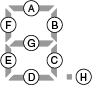

The image shows 8 variables A-H, where A-G represent one of the segments for illuminating a digit and H represents a decimal point. 

Since our dataset is the MNIST dataset, we are proceeding with the assumption that the decimal point (H) is not part of our data. 

The activation of the combination of variables that represent each digit 0-9 can be shown with the following truth table.

##### Truth Table for 7-segment display
<table>
    <thead>
        <tr>
            <th scope="col">Digit to display</th>
            <th scope="col">A</th>
            <th scope="col">B</th>
            <th scope="col">C</th>
            <th scope="col">D</th>
            <th scope="col">E</th>
            <th scope="col">F</th>
            <th scope="col">G</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>0</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>0</td>
        </tr>
        <tr>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>2</td>
            <td>1</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
        </tr>
        <tr>
            <td>3</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
        </tr>
        <tr>
            <td>4</td>
            <td>0</td>
            <td>1</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>1</td>
        </tr>
        <tr>
            <td>5</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>1</td>
        </tr>
        <tr>
            <td>6</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
        </tr>
        <tr>
            <td>7</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>8</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
        </tr>
        <tr>
            <td>9</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>1</td>
        </tr>
    </tbody>
</table>

### Code for solution of task #4

In [1]:
# imports for task #4
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Now we build a map for the 7-segment display
# This will map our digits to their corresponding combination of 0/1 value combinations for the variables A-G
SEGMENT_MAP = {
    0: [1,1,1,1,1,1,0],
    1: [0,1,1,0,0,0,0],
    2: [1,1,0,1,1,0,1],
    3: [1,1,1,1,0,0,1],
    4: [0,1,1,0,0,1,1],
    5: [1,0,1,1,0,1,1],
    6: [1,0,1,1,1,1,1],
    7: [1,1,1,0,0,0,0],
    8: [1,1,1,1,1,1,1],
    9: [1,1,1,1,0,1,1]
}

In [3]:
# Loading and preprocessiong MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
# Creating 7-segment targets
y_train_seg = np.array([SEGMENT_MAP[label] for label in y_train])
y_test_seg = np.array([SEGMENT_MAP[label] for label in y_test])

In [5]:
# Convolutional Autoencoder
latent_dim = 32
input_img = keras.Input(shape=(28, 28, 1))

In [6]:
# Encoder
x = keras.layers.Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D(2, padding='same')(x)
x = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D(2, padding='same')(x)

In [7]:
# Decoder
x = keras.layers.Conv2DTranspose(16, 3, activation='relu', padding='same')(encoded)
x = keras.layers.UpSampling2D(2)(x)
x = keras.layers.Conv2DTranspose(32, 3, activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D(2)(x)
decoded = keras.layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
# Training the autoencoder
autoencoder.fit(
    x_train[..., np.newaxis], x_train[..., np.newaxis],
    epochs=20,
    batch_size=128,
    validation_data=(x_test[..., np.newaxis], x_test[..., np.newaxis])
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - loss: 0.2285 - val_loss: 0.0806
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0796 - val_loss: 0.0747
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0747 - val_loss: 0.0726
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0727 - val_loss: 0.0711
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0715 - val_loss: 0.0701
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0704 - val_loss: 0.0694
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - loss: 0.0697 - val_loss: 0.0688
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0694 - val_loss: 0.0684
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - loss: 0.0687 - val_loss: 0.0679
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0684 - val_loss: 0.0676
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0680 - val_loss: 0.0673
Epoch 12/20
469/469 ━━━━━━━━━━

In [9]:
# Creating encoder model for feature extraction
encoder = keras.Model(input_img, encoded)

In [10]:
# MLP Classifier
mlp = keras.Sequential([
    keras.layers.Flatten(input_shape=(7,7,16)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(7, activation='sigmoid')
])

mlp.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

d:\projects\ADL-Assignment-1\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Training MLP on encoded features
encoded_train = encoder.predict(x_train[..., np.newaxis])
mlp.fit(encoded_train, y_train_seg, epochs=15, batch_size=128)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3132 - loss: 0.2611
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3535 - loss: 0.0876
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3517 - loss: 0.0694
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3659 - loss: 0.0618
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3772 - loss: 0.0587
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3710 - loss: 0.0535
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3481 - loss: 0.0487
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3847 - loss: 0.0458
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3785 - loss: 0.0447
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3875 - loss: 0.0413
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4054 - loss: 0.0406
Epoch 12/

In [12]:
# Evaluation
encoded_test = encoder.predict(x_test[..., np.newaxis])
predictions = mlp.predict(encoded_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step


In [13]:
# Function to convert predictions to digits using Hamming distance
def segment_to_digit(pred):
    pred_binary = (pred > 0.5).astype(int)
    distances = []
    for digit in range(10):
        distances.append(np.sum(pred_binary != SEGMENT_MAP[digit]))
    return np.argmin(distances)

In [14]:
# Fetching predicted values into an array for creating confusion matrix
y_pred = np.array([segment_to_digit(p) for p in predictions])

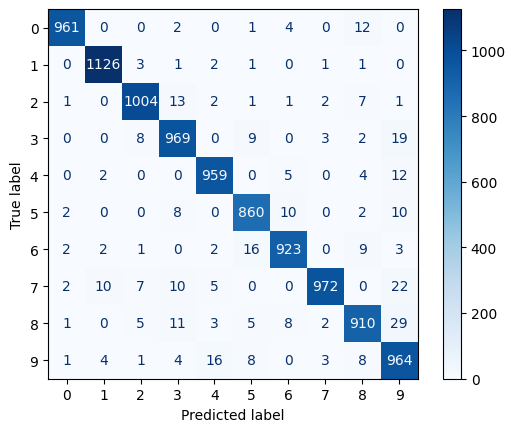

In [15]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [16]:
# Creating a performance report for sanity
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy*100:.4f}%")
print("Class-wise Accuracy:")
for i in range(10):
    class_acc = np.mean(y_pred[y_test == i] == i)
    print(f"Digit {i}: {class_acc*100:.4f}%")

Test Accuracy: 96.4800%
Class-wise Accuracy:
Digit 0: 98.0612%
Digit 1: 99.2070%
Digit 2: 97.2868%
Digit 3: 95.9406%
Digit 4: 97.6578%
Digit 5: 96.4126%
Digit 6: 96.3466%
Digit 7: 94.5525%
Digit 8: 93.4292%
Digit 9: 95.5401%


In [17]:
# visualizing the outputs for sanity
def plot_7segment(segments, threshold=0.5):
    # Segment positions (a-g) [5]
    segments = (segments > threshold).astype(int)
    coords = {
        'a': [(3, 13), (10, 13)],
        'b': [(11, 10), (11, 3)],
        'c': [(11, 0), (11, -7)],
        'd': [(3, -7), (10, -7)],
        'e': [(2, 0), (2, -7)],
        'f': [(2, 3), (2, 10)],
        'g': [(3, 3), (10, 3)]
    }

    for seg, (code, pos) in zip(segments, coords.items()):
        if seg == 1:
            plt.plot([pos[0][0], pos[1][0]], 
                    [pos[0][1], pos[1][1]], 
                    color='red', linewidth=3)
    
    plt.xlim(-2, 15)
    plt.ylim(-10, 15)

def visualize_predictions(num_samples=5):
    indices = np.random.choice(len(x_test), num_samples)
    plt.figure(figsize=(15, 3*num_samples))
    
    for i, idx in enumerate(indices):
        # Original image
        plt.subplot(num_samples, 3, 3*i+1)
        plt.imshow(x_test[idx], cmap='gray')
        plt.title(f"Input Digit\n(Actual: {y_test[idx]})")
        plt.axis('off')

        # Predicted digit
        plt.subplot(num_samples, 3, 3*i+3)
        plt.text(0.5, 0.5, str(y_pred[idx]), 
                fontsize=40, ha='center', va='center')
        plt.title("Predicted Digit")
        plt.axis('off')

        # Predicted 7-segment display
        plt.subplot(num_samples, 3, 3*i+2)
        plot_7segment(predictions[idx])
        plt.title("Predicted Segments")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

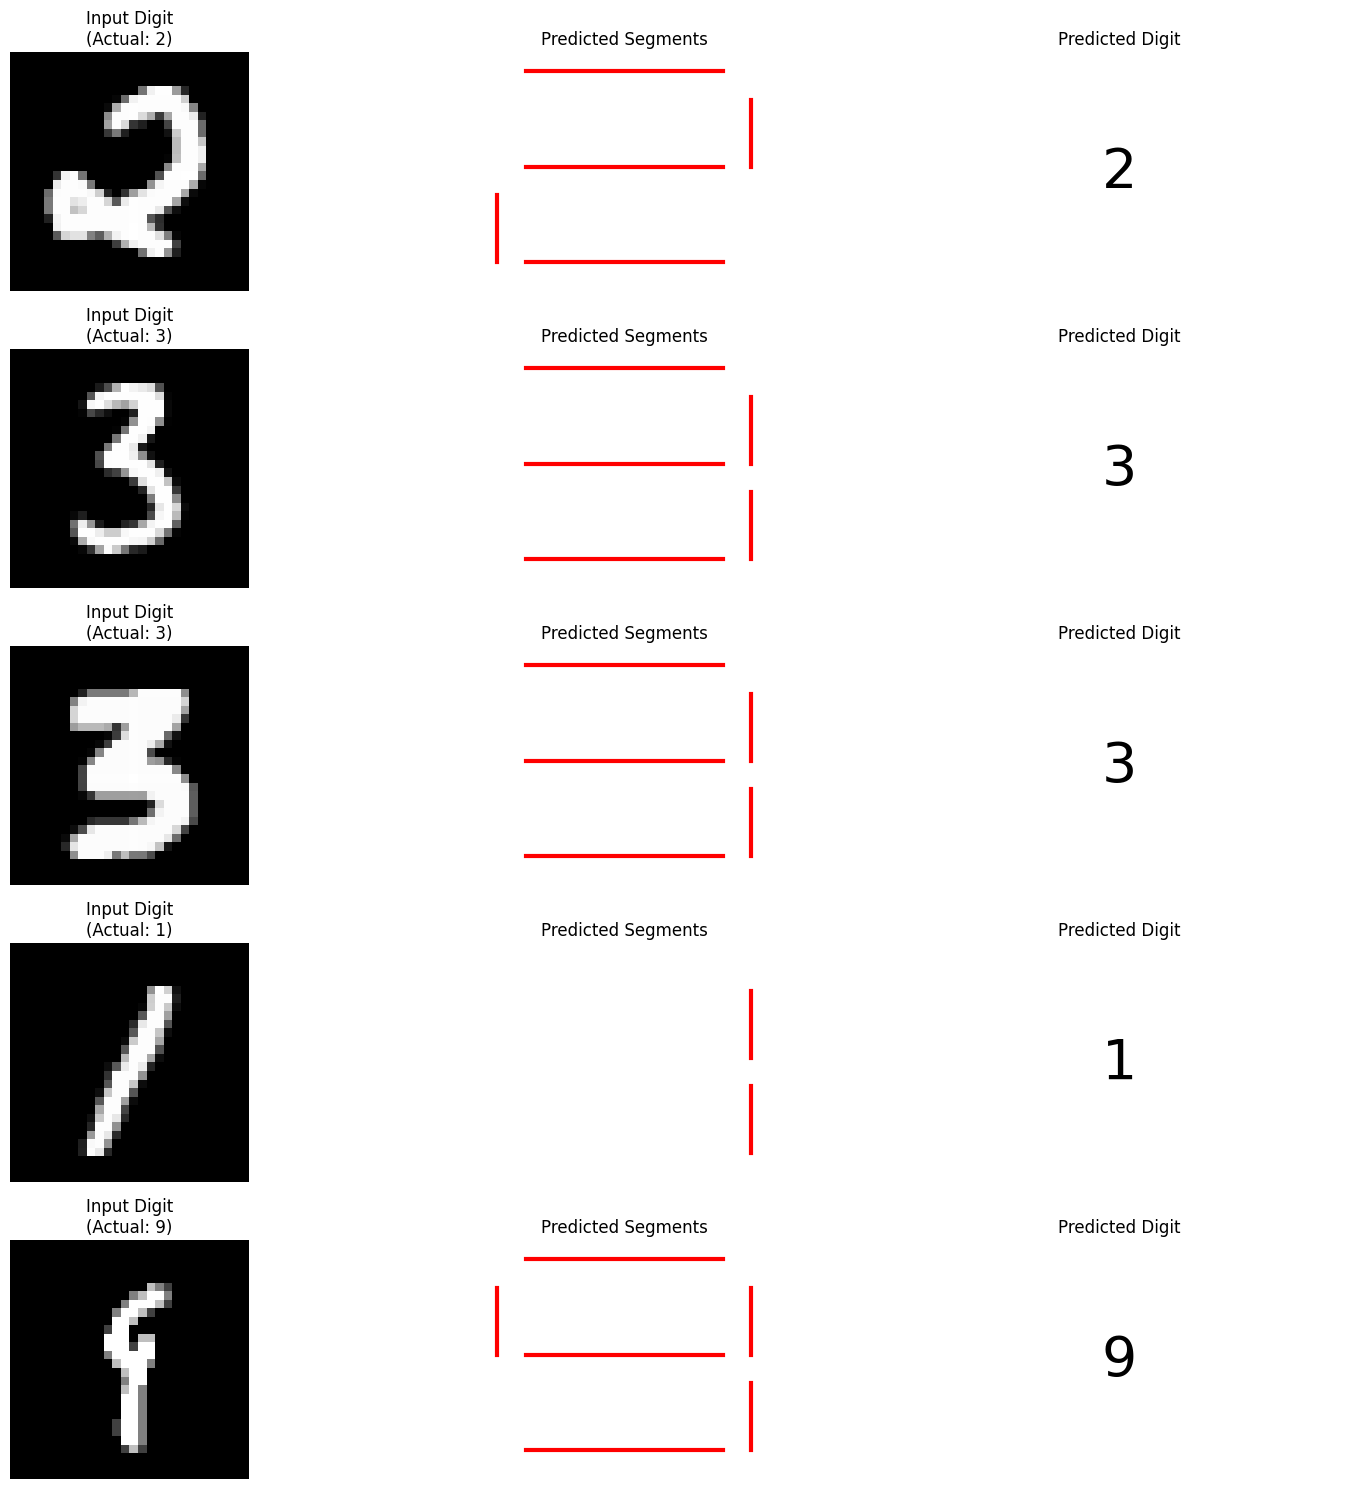

In [18]:
visualize_predictions()